### 1-导入数据
这个数据集的特征有：
- Area：房屋面积，平方米
- Room：房间数，间
- Living: 厅数，间
- School: 是否为学区房，0或1
- Year: 房屋建造时间，年
- Floor: 房屋所处楼层，层

目标变量：
- Value: 房屋人民币售价，万

In [34]:
# 载入此项目所需要的库
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code

# 检查你的Python版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception('请使用Python 2.7来完成此项目')
    
# 让结果在notebook中显示
%matplotlib inline

In [35]:
# 载入北京房屋的数据集
data = pd.read_csv('bj_housing.csv')
prices = data['Value']
features = data.drop('Value', axis = 1)
    
# 完成
print "Beijing housing dataset has {} data points with {} variables each.".format(*data.shape)

Beijing housing dataset has 9999 data points with 7 variables each.


### 2-分析数据
- **特征** 'Area', 'Room', 'Living', 'School', 'Year', 'Floor'
- **目标变量** 'Value'

#### 2.1 基础统计

In [48]:
#目标：计算价值的最小值
minimum_price = prices.min()

#目标：计算价值的最大值
maximum_price = prices.max()

#目标：计算价值的平均值
mean_price = prices.mean()

#目标：计算价值的中值
median_price = prices.median()

#目标：计算价值的标准差
std_price = prices.std(ddof=0)

#目标：输出计算的结果
print "Statistics for Beijing housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

# 查看统计信息
area = data['Area']
room = data['Room']
living = data['Living']
school = data['School']
year = data['Year']
floor = data['Floor']
print "Area: max={}, min={}, median={}, mean={}".format(area.max(), area.min(), area.median(), area.mean())
print "Room: max={}, min={}, median={}, mean={}".format(room.max(), room.min(), room.median(), room.mean())
print "Living: max={}, min={}, median={}, mean={}".format(living.max(), living.min(), living.median(), living.mean())
print "School: max={}, min={}, median={}, mean={}".format(school.max(), school.min(), school.median(), school.mean())
print "Year: max={}, min={}, median={}, mean={}".format(year.max(), year.min(), year.median(), year.mean())
print "Floor: max={}, min={}, median={}, mean={}".format(floor.max(), floor.min(), floor.median(), floor.mean())

Statistics for Beijing housing dataset:

Minimum price: $66.00
Maximum price: $7,450.00
Mean price: $342.08
Median price $280.00
Standard deviation of prices: $259.39
Area: max=1124, min=14, median=83.0, mean=92.00390039
Room: max=9, min=1, median=2.0, mean=2.15621562156
Living: max=4, min=0, median=1.0, mean=1.27762776278
School: max=1, min=0, median=1.0, mean=0.58395839584
Year: max=2015, min=1014, median=2000.0, mean=1998.23552355
Floor: max=91, min=0, median=12.0, mean=13.3264326433


#### 2.2 特征分析
- 各特征对目标变量的影响，即随着'Area', 'Room', 'Living', 'School', 'Year', 'Floor'增大或减小，'Value'是增大还是减小

#### 2.3 数据分割、重排
把数据集分为训练和测试2个子集。在这个过程中，数据也会被重排列，选择一个random_state以消除数据集中由于顺序而产生的偏差

使用 `sklearn.model_selection` 中的 `train_test_split`， 将`features`和`prices`的数据都分成用于训练的数据子集和用于测试的数据子集。
  - 分割比例为：80%的数据用于训练，20%用于测试；
  - 选定一个数值以设定 `train_test_split` 中的 `random_state` ，这会确保结果的一致性；

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

### 3-定义衡量标准
- **决定系数**R<sup>2</sup>

> R<sup>2</sup>的数值范围从0至1，表示**目标变量**的预测值和实际值之间的相关程度平方的百分比。一个模型的R<sup>2</sup> 值为0还不如直接用**平均值**来预测效果好；而一个R<sup>2</sup> 值为1的模型则可以对目标变量进行完美的预测。从0至1之间的数值，则表示该模型中目标变量中有百分之多少能够用**特征**来解释。_模型也可能出现负值的R<sup>2</sup>，这种情况下模型所做预测有时会比直接计算目标变量的平均值差很多。_

In [38]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """计算并返回预测值相比于预测值的分数"""
    
    score = r2_score(y_true, y_predict)

    return score

### 4-分析模型表现

#### 学习曲线

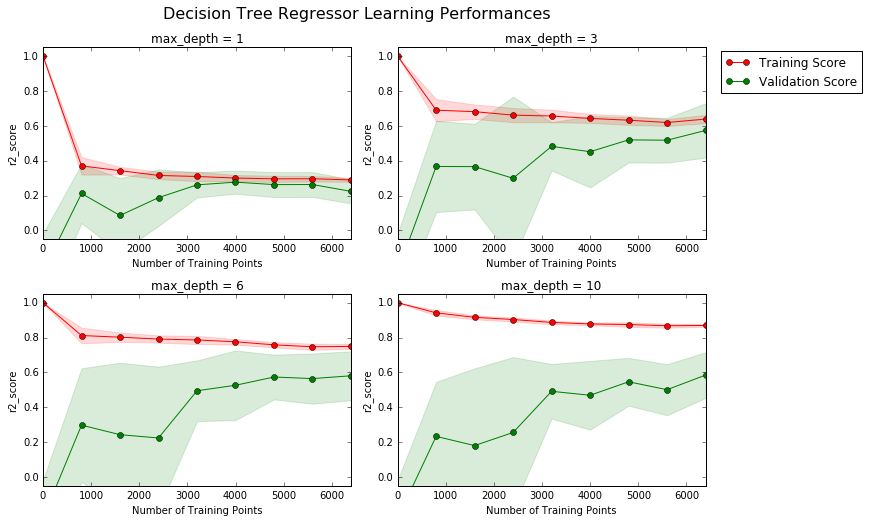

In [39]:
# 根据不同的训练集大小，和最大深度，生成学习曲线
vs.ModelLearning(X_train, y_train)

从学习曲线可以看出，mat_depth=6时模型表现最优

#### 复杂度曲线

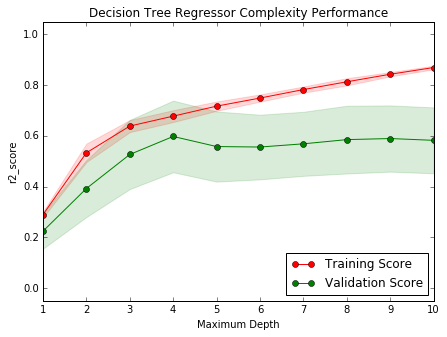

In [40]:
# 根据不同的最大深度参数，生成复杂度曲线
vs.ModelComplexity(X_train, y_train)

***从复杂度曲线来看，max_depth=7时模型的表现要好于max_depth=6***

### 5-选择最优参数

#### 网格搜索 + 交叉验证

**训练最优模型**

使用决策树算法训练一个模型. 为了得出的是一个最优模型，你需要使用网格搜索法训练模型，以找到最佳的 'max_depth' 参数。你可以把'max_depth' 参数理解为决策树算法在做出预测前，允许其对数据提出问题的数量.

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, KFold

def fit_model(X, y):
    """ 基于输入数据 [X,y]，利于网格搜索找到最优的决策树模型"""
    
    cross_validator = KFold() # use default value: n_splits=3
    
    regressor = DecisionTreeRegressor()

    params = {'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

    scoring_fnc = metrics.make_scorer(performance_metric)

    grid = GridSearchCV(estimator = regressor,
                        param_grid = params,
                        scoring = scoring_fnc,
                        cv = cross_validator
                       )

    # 基于输入数据 [X,y]，进行网格搜索
    grid = grid.fit(X, y)
    
    #print pd.DataFrame(grid.cv_results_)

    # 返回网格搜索后的最优模型
    return grid.best_estimator_

#### 获得最优模型

In [42]:
# 基于训练数据，获取最优模型
optimal_reg = fit_model(X_train, y_train)

# 输出最优模型的 'max_depth' 参数
print "Parameter 'max_depth' is {} for the optimal model.".format(optimal_reg.get_params()['max_depth'])

Parameter 'max_depth' is 3 for the optimal model.


### 6-做出预测

#### 预测销售价格

In [49]:
client_data = [[82, 3, 2, 1, 2008, 11],
               [30, 1, 0, 0, 1996, 6],
               [900, 8, 3, 1, 2014, 48]]

# 进行预测
predicted_price = optimal_reg.predict(client_data)
for i, price in enumerate(predicted_price):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $301.08
Predicted selling price for Client 2's home: $219.80
Predicted selling price for Client 3's home: $7,450.00


#### 在验证集上预测

In [46]:
y_pred = optimal_reg.predict(X_test)
r2 = performance_metric(y_test, y_pred)

print "Optimal model has R^2 score {:,.2f} on test data".format(r2)

## 验证人工猜测参数的 R2
my_depth = 5
my_reg = DecisionTreeRegressor(max_depth=my_depth)
my_reg.fit(X_train, y_train)

y_pred_my = my_reg.predict(X_test)
r2_my = performance_metric(y_test, y_pred_my)

print "max_depth = {} model has R^2 score {:,.2f} on test data".format(my_depth, r2_my)

Optimal model has R^2 score 0.60 on test data
max_depth = 5 model has R^2 score 0.64 on test data


### 模型健壮性

In [50]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $351.03
Trial 2: $349.04
Trial 3: $358.51
Trial 4: $365.49
Trial 5: $401.72
Trial 6: $555.83
Trial 7: $276.08
Trial 8: $359.68
Trial 9: $355.72
Trial 10: $352.98

Range in prices: $279.75
